<a href="https://colab.research.google.com/github/Daltonlbs/StockFeelz/blob/main/ExodiaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy as tw
import pandas as pd
import numpy as np
#import nltk
from nltk.tokenize import TweetTokenizer
#from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB
#import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
consumer_key = 'Qkea9MJ2gz5RHczABY2Xsax0r'
consumer_secret = 'ULNLPhJyBNbk23gWECGRekAxJHk49SuiKHMYbz55U83SFRNOoQ'
access_token = '1483553041165037571-G4evKQ1uPCxWfEOYeY503opQksgsR5'
access_token_secret = 'AD1VM0SrYIdqJPjHgJHmMLZnYh49ktbx6JxGmZH8K2mCa'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

In [ ]:
userIDT = ["BTGoldDigital", "ducavendish", "jocanetoo","cafecomferri", "FariaLimaElevat", "albuquerque_af", "CerizePedro",
         "Tiagogreis", "mendlowicz", "jlbraga", "ThiagoNigro", "nonoinvestidor", "PLynchado", "lnunesjr", "andy_kawamoto",
         "BruceBarbosa88", "RafaelPaschoare", "luizfalvesjr", "Economesteter", "MatInvest1", "CapivaraCorp", "helocruz",
         "jcamargonyc", "LucasCostaAT", "HeglerHenri", "HugoQueiroz_", "RaphaFigueredo", "9vaes", "israel_massa",
         "renoirvieira", "sergiosanita", "EvertonLeblon", "InvestWolf", "CarlosAlc1955", "Small__Caps", "uorrembife",
         "Cacomaia", "FelipePontesPB", "_rschweitzer", "mfbohm", "MeninRibeiro", "quantzed_CFA", "pedrostrader", 
         "THIAGOSALOMAO", "f_alperowitch","fferreira_xp", "Dalberini", "rafaelfreitaso", "mcmanocall","dicadehoje7", 
         "Matheusbsanches", "cesaralpaiva", "voloch_m", "FabioJBacha", "edsviewz", "rodrigo_natali","DaltonLBS","BerchtFabien",
          "marcosaravalle", "rafaelbboa", "HerreraCondor", "olongoprazo", "portalsmallcaps", "joaosandrini", "ArthurLulaM",
          "khalildelima1", "thiagomd_1","Dgermanovix", "quantzed", "PaolaMelloM", "sara_invest", "alisc", 
           "Carlos_Parente2", "bmcnewstv", "joaocontador11", "bussoladoinves", "trademapapp", "valorinveste",
           "victorkj", "TrigonoCapital", "lourau_joao", "mrmarketb3", "cbojlesen", "alphatradingApp", "musashinvest", 
           "insiderreportbr", "clubedopairico", "FilipeVillegas", "alexinvest27", "tiagobfriedrich", "jarbas_gambogi",
          "yuhzo_breyer", "gerandoalfa", "ZattarRafael", "RamiroGFerreira", "rbreia", "brazilianequity","RicardoJorge_RJ",
           "MuriloYamamoto4", "fintwitbrtrends", "DanKawa2", "CSLupinacci", "collacomigo", "candremv",
           "felipe__ruiz", "CarliniCarter", "Rollo_Real", "FabioHolder", "Monkey_Stocks", "omarajame", "Felippe_Hermes",
           "andersonmeneses", "GersonJunior__", "PedrooLula"]

IDT = []
for ID in userIDT:
    #print(ID)
    IDtweets = api.user_timeline(screen_name=ID, 
                                count = 100, #100, #200
                                include_rts = False,
                                tweet_mode = 'extended')
    for tweet in IDtweets:
        IDT.append(tweet.full_text)
        #print(tweet.full_text)  
    cv = CountVectorizer()  #Converte uma coleção de textos em uma matrix de tokens
    count_matrix = cv.fit_transform(IDT) #Dtweets 
        
    twords = pd.DataFrame(cv.get_feature_names_out(), columns = ['word'])
    twords["count"] = count_matrix.sum(axis = 0).tolist()[0]
    twords = twords.sort_values("count", ascending = False).reset_index(drop = True)
    
    tpal = twords.word
    TPP = []
    for p in tpal:
        if (len(p) == 5 and (p[-1] == '3' or p[-1] == '4' or p[-1] == '5' or p[-1] == '6')) or (len(p) == 6 and (p[-2:] == '11' or p[-2:] == '33')):
            TPP.append(p)
        if (len(p) == 6 and (p[-1] == '3' or p[-1] == '4' or p[-1] == '5' or p[-1] == '6') and (p[0] == '#')) or (len(p) == 7 and (p[-2:] == '11' or p[-2:] == '33') and p[0] == '#'):
            k=p[1:]
            print(p)
            TPP.append(k)
    
    
TTPP = pd.DataFrame(TPP, columns = ['word'])                    
TTPP = TTPP.merge(twords, how = 'inner', on= 'word') #, left_index=True 
TTPP.head(10)

,word,count
0,petr4,128
1,vale3,89
2,mglu3,76
3,oibr3,50
4,irbr3,45
5,viia3,39
6,wege3,35
7,prio3,31
8,petr3,27
9,bbas3,26


In [ ]:
len(userIDT)

114

In [ ]:
TTPP2 = pd.DataFrame()
TTPP2['word']  = TTPP['word']
TTPP2['count'] = TTPP.iloc[:,-1]
#TTPP2.head(15)

In [ ]:
#header = ["word", "count"]
#TTPP2.to_csv('Tacoes080322.csv', index = False) #, columns=header
TTPP2.describe()

,count
count,279.000000
mean,6.315412
std,12.060138
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,127.000000


In [ ]:
#topp=TTPP2[TTPP2['count']> int(TTPP2.describe().loc['mean'] + TTPP2.describe().loc['std'])]
#topp=TTPP2[TTPP2['count']> int(TTPP2.describe().loc['50%'] + TTPP2.describe().loc['std'])]
topp=TTPP2[TTPP2['count']> int(TTPP2.describe().loc['75%'])]    # =

topp[:20]

,word,count
0,petr4,127
1,vale3,90
2,mglu3,82
3,oibr3,48
4,irbr3,43
5,viia3,40
6,wege3,38
7,prio3,31
8,petr3,27
9,embr3,27


In [ ]:
len(topp)

63

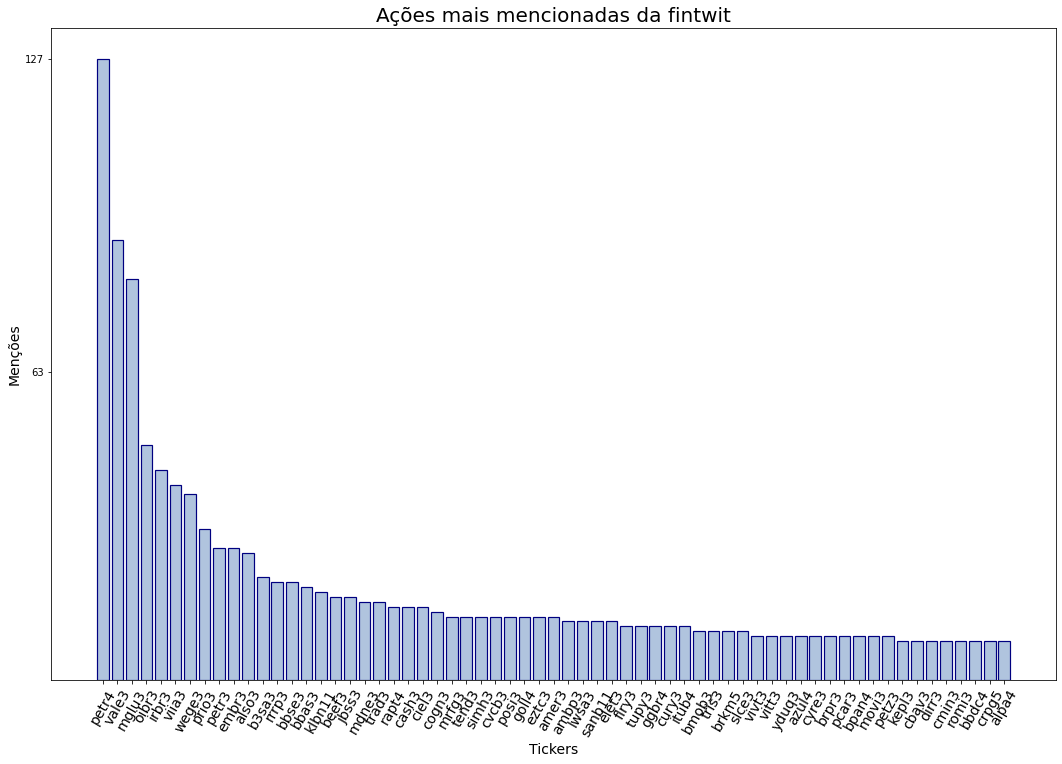

In [ ]:
l = topp#[:30]
l1=int(l.iloc[0][1])
l2=int(l1/2)


plt.figure(figsize=(18,12))
plt.bar(l['word'],l['count'], color='lightsteelblue', edgecolor= 'navy', linewidth=1.2) 
plt.title('Ações mais mencionadas da fintwit', fontsize='20')
plt.xlabel('Tickers', fontsize='14')
plt.ylabel('Menções', fontsize='14')
plt.yticks([l1,l2])
plt.xticks(fontsize='14',  rotation = 60)

plt.show();

In [ ]:
top = topp#[0:10]
top

,word,count
0,petr4,127
1,vale3,90
2,mglu3,82
3,oibr3,48
4,irbr3,43
...,...,...
58,cmin3,8
59,romi3,8
60,bbdc4,8
61,crpg5,8


In [ ]:
#######################################
#   SALVAR E CARREGAR OS ARQUIVOS
#######################################

In [ ]:
toto = pd.read_csv("drive/My Drive/Colab Notebooks/Dados/toth.csv") #, sep = ','
toto.to_csv('toto.csv', index = False)
!cp toto.csv "drive/My Drive/Colab Notebooks/Dados"
#toto
topo = pd.read_csv("drive/My Drive/Colab Notebooks/Dados/toph.csv") #, sep = ','
topo.to_csv('topo.csv', index = False)
!cp topo.csv "drive/My Drive/Colab Notebooks/Dados"
#topo

In [ ]:
TTPP2.to_csv('toth.csv', index = False)
!cp toth.csv "drive/My Drive/Colab Notebooks/Dados"

topp.to_csv('toph.csv', index = False)
!cp toph.csv "drive/My Drive/Colab Notebooks/Dados"

In [ ]:
topJ = topp.merge(topo, how = 'outer', right_on='word',left_on='word')
topJ=topJ.fillna(0)
topJ.head(11)

,word,count_x,count_y
0,petr4,127.0,99.0
1,vale3,90.0,75.0
2,mglu3,82.0,84.0
3,oibr3,48.0,33.0
4,irbr3,43.0,20.0
5,viia3,40.0,57.0
6,wege3,38.0,13.0
7,prio3,31.0,34.0
8,petr3,27.0,14.0
9,embr3,27.0,0.0


In [ ]:
totJ = TTPP2.merge(toto, how = 'outer', right_on='word',left_on='word')
totJ = totJ.fillna(0)
totJ['Diff'] = totJ['count_x'] - totJ['count_y'] 
totJ

,word,count_x,count_y,Diff
0,petr4,127.0,99.0,28.0
1,vale3,90.0,75.0,15.0
2,mglu3,82.0,84.0,-2.0
3,oibr3,48.0,33.0,15.0
4,irbr3,43.0,20.0,23.0
...,...,...,...,...
289,btra11,0.0,1.0,-1.0
290,itsa3,0.0,1.0,-1.0
291,igta3,0.0,1.0,-1.0
292,enev3,0.0,1.0,-1.0


In [ ]:
varTot = pd.DataFrame
varTot = totJ.sort_values(by=['Diff'], ascending = False)
varTot = varTot.drop(['count_x','count_y'], axis = 1)

print(varTot.head(10))
print("\n")
print(varTot.tail(10))

varTot.to_csv('varTot.csv', index = False)
!cp varTot.csv "drive/My Drive/Colab Notebooks/Dados"

      word  Diff
0    petr4  28.0
6    wege3  25.0
4    irbr3  23.0
9    embr3  22.0
10   also3  19.0
15  klbn11  16.0
1    vale3  15.0
3    oibr3  15.0
8    petr3  13.0
33   lwsa3   8.0


      word  Diff
67   itsa4  -9.0
29   goll4  -9.0
177  csna3  -9.0
63   tasa4  -9.0
75   ligt3  -9.0
73   mrve3 -11.0
22   ciel3 -12.0
57   dirr3 -13.0
48   azul4 -14.0
5    viia3 -17.0


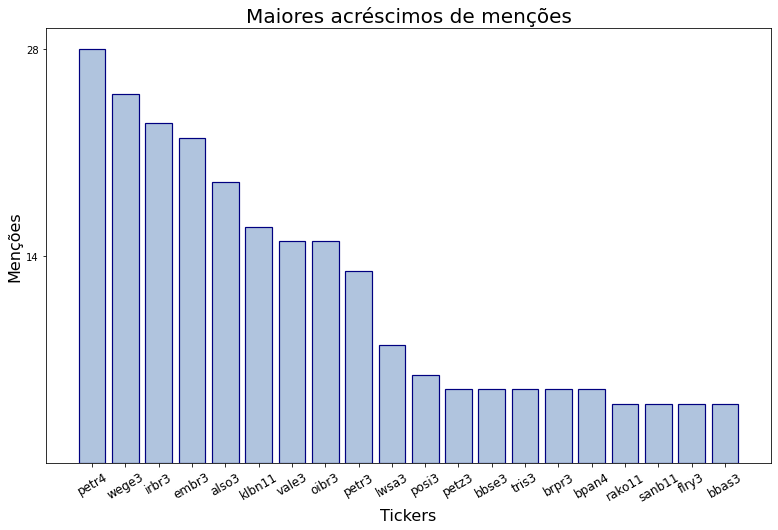

In [ ]:
x = varTot[varTot["Diff"]>1][:20]
#x = varTot[varTot["Diff"]<-1][:15]
#x = varTot[:15]
x1 = int(x.iloc[0][1])
x2 = int(x1 / 2)

plt.figure(figsize=(13,8))

plt.bar(x['word'],x['Diff'], color='lightsteelblue', edgecolor= 'navy', linewidth=1.2) 
plt.title('Maiores acréscimos de menções', fontsize='20')
plt.xlabel('Tickers', fontsize='16')
plt.ylabel('Menções', fontsize='16')
plt.xticks(fontsize='12',  rotation = 30)
plt.yticks([x1, x2])

plt.show();

In [ ]:
topEntra=topJ[topJ['count_y'] == 0]
topEntra= topEntra.drop(['count_x','count_y'], axis = 1)
topEntra

,word
9,embr3
10,also3
15,klbn11
28,posi3
33,lwsa3
34,sanb11
36,flry3
42,tris3
43,brkm5
46,vitt3


In [ ]:
topSai=topJ[topJ['count_x'] == 0]
topSai= topSai.drop(['count_x','count_y'], axis = 1)
topSai

,word
63,mrve3
64,itsa4
65,tasa4
66,ligt3
67,abev3
68,hapv3
69,recv3
70,csna3
71,plpl3
72,rail3


In [ ]:
varMais=varTot[varTot['Diff']> 2]
varMenos=varTot[varTot['Diff']< -2]

#varTot.describe()
varMais
#varMenos

,word,Diff
0,petr4,28.0
6,wege3,25.0
4,irbr3,23.0
9,embr3,22.0
10,also3,19.0
15,klbn11,16.0
1,vale3,15.0
3,oibr3,15.0
8,petr3,13.0
33,lwsa3,8.0


In [ ]:
#################################################
#             
#################################################

In [ ]:
# Cria o modelo a partir da base de dados dos tweets sobre o governo de minas gerais


df = pd.read_csv('drive/My Drive/Colab Notebooks/Dados/Tweets_Mg.csv', encoding='utf-8')
dff = df.drop_duplicates(['Text'])
dff = dff[["Text", "Classificacao"]]

dfneg = dff[dff["Classificacao"] == "Negativo"][:951]       
dfneu = dff[dff["Classificacao"] == "Neutro"][:951]         
dfpos = dff[dff["Classificacao"] == "Positivo"][:951]

dft= pd.DataFrame
dft=pd.concat([dfneg, dfneu], ignore_index=True)
dft=pd.concat([dft, dfpos], ignore_index=True)

print(dft.Text.count())
#dft.Classificacao.value_counts().plot(kind='bar')

2853


In [ ]:
#Separa as series mais importantes para o treinamento
tweets = dft['Text']
classes = dft['Classificacao']       

In [ ]:
#Acessa os modelos de tokenização e vetorização do modelo
tweet_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize) 

In [ ]:
# Faz o Fit do modelo de vetorização
freq_tweets = vectorizer.fit_transform(tweets) # Tokeniza o texto dos tweets, e aloca à variável freq_tweets
type(freq_tweets)    

scipy.sparse.csr.csr_matrix

In [ ]:
modelo = MultinomialNB()            # Ativa um modelo Multinomial
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [ ]:
#len(TTPP)
#topp = TTPP2[:40]
len(topp)

63

In [ ]:
qtd = 50 #100
MASTER = pd.DataFrame(index =['Menções',
                                'Negativo',
                                'Neutro',
                                'Positivo',
                                'Intensidade_Total',
                                'Intensidade_Media'])


topp=topp[:30] #[:15]
#for w in top["word"]:
for w in topp["word"]:
    j=0
    data=[]
    search_words = w + " -filter:retweets"
   
    c_tweets = tw.Cursor(api.search, #search_tweets
                  q=search_words).items(qtd)
    
    
    for tweet in c_tweets:
        j+=1
        if j==qtd: # or j==1:
            print(w,j)      
        data.append(tweet.text)
    
    freq_parcial = vectorizer.transform(data)
    taux= modelo.predict_proba(freq_parcial).round(2)
    q=0
    aux=0
    for i in taux:
      aux+=(i[2]-i[0]).round(2)
    ttl=aux
    aux=(aux/len(data)).round(2)
    xxx=modelo.predict(freq_parcial) 
    try:
      negneg = np.unique(xxx, return_counts=True)[1][0]
    except IndexError:
      negneg = 0
    try:
      neuneu = np.unique(xxx, return_counts=True)[1][1]
    except IndexError:
      neuneu = 0
    try:
      pospos = np.unique(xxx, return_counts=True)[1][2]
    except IndexError:
      pospos = 0
    MEIO = [len(data), negneg, neuneu, pospos, ttl, aux]
    MASTER[w]= MEIO

MASTER

petr4 50
vale3 50
mglu3 50
oibr3 50
irbr3 50
viia3 50
wege3 50
prio3 50
petr3 50
embr3 50
also3 50
b3sa3 50
rrrp3 50
bbse3 50
bbas3 50
klbn11 50
beef3 50
jbss3 50
trad3 50
cash3 50
ciel3 50
cogn3 50
mrfg3 50
tend3 50
posi3 50
goll4 50


,petr4,vale3,mglu3,oibr3,irbr3,viia3,wege3,prio3,petr3,embr3,...,rapt4,cash3,ciel3,cogn3,mrfg3,tend3,simh3,cvcb3,posi3,goll4
Menções,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,36.00,50.00,50.00,50.00,50.00,50.00,13.00,45.00,50.00,50.00
Negativo,8.00,3.00,15.00,14.00,10.00,13.00,6.00,15.00,10.00,9.00,...,9.00,16.00,8.00,12.00,12.00,3.00,2.00,9.00,17.00,6.00
Neutro,39.00,45.00,34.00,36.00,34.00,35.00,41.00,33.00,38.00,27.00,...,25.00,32.00,39.00,33.00,35.00,47.00,11.00,35.00,30.00,37.00
Positivo,3.00,2.00,1.00,0.00,6.00,2.00,3.00,2.00,2.00,14.00,...,2.00,2.00,3.00,5.00,3.00,0.00,0.00,1.00,3.00,7.00
Intensidade_Total,-5.50,2.53,-12.70,-12.57,-3.65,-10.17,-3.94,-8.64,-2.51,8.15,...,-5.74,-11.79,-2.42,-7.47,-5.14,-1.56,-1.19,-5.32,-11.04,1.02
Intensidade_Media,-0.11,0.05,-0.25,-0.25,-0.07,-0.20,-0.08,-0.17,-0.05,0.16,...,-0.16,-0.24,-0.05,-0.15,-0.10,-0.03,-0.09,-0.12,-0.22,0.02


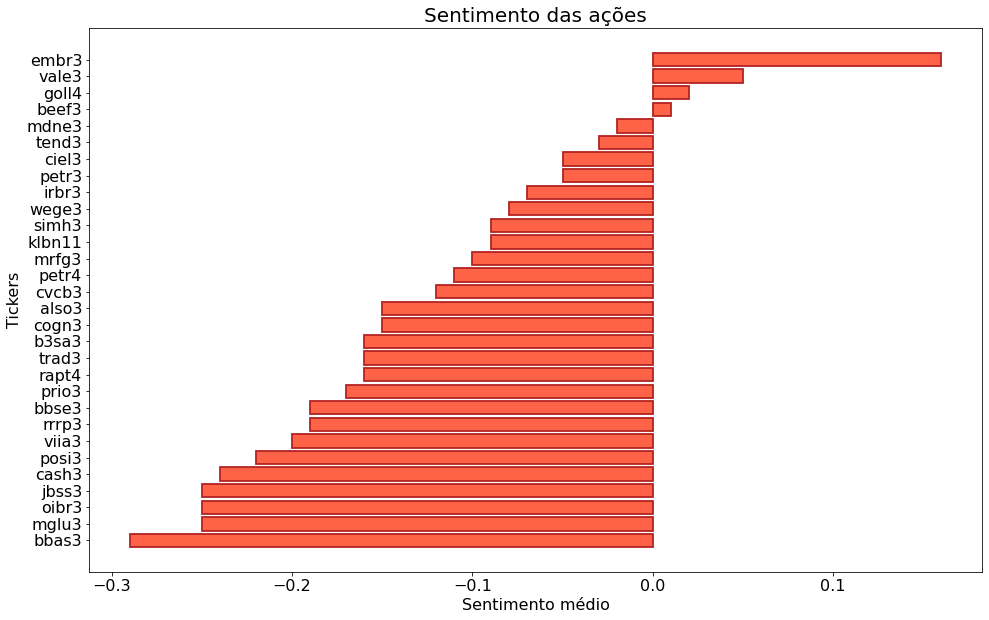

In [ ]:
plt.figure(figsize=(16,10))

MASTERT=MASTER.T.sort_values(by=['Intensidade_Media'])

#MASTER

plt.barh(MASTERT.index, MASTERT['Intensidade_Media'], color='tomato', edgecolor= 'firebrick', linewidth=1.8) 
plt.title('Sentimento das ações', fontsize='20')
plt.xlabel('Sentimento médio', fontsize='16')
plt.ylabel('Tickers', fontsize='16')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

plt.show();

In [ ]:
MASTERT['Intensidade_Media'].mean()

0.06966666666666668

In [ ]:
###############################################################

###############################################################
len(x)

20

In [ ]:


qtd = 50
MASTERC = pd.DataFrame(index =['Menções',
                                'Negativo',
                                'Neutro',
                                'Positivo',
                                'Intensidade_Total',
                                'Intensidade_Media'])

#for w in varMais["word"]:
for w in x["word"]:
    j=0
    data=[]
    search_words = w + " -filter:retweets"
   
    c_tweets = tw.Cursor(api.search, #search_tweets
                  q=search_words).items(qtd)
    
    
    for tweet in c_tweets:
        j+=1
        if j==qtd: # or j==1:
            print(w,j)      
        data.append(tweet.text)
    
    freq_parcial = vectorizer.transform(data)
    taux= modelo.predict_proba(freq_parcial).round(2)
    q=0
    aux=0
    for i in taux:
      aux+=(i[2]-i[0]).round(2)
    ttl=aux
    aux=(aux/len(data)).round(2)
    xxx=modelo.predict(freq_parcial)
    try:
      negneg = np.unique(xxx, return_counts=True)[1][0]
    except IndexError:
      negneg = 0
    try:
      neuneu = np.unique(xxx, return_counts=True)[1][1]
    except IndexError:
      neuneu = 0
    try:
      pospos = np.unique(xxx, return_counts=True)[1][2]
    except IndexError:
      pospos = 0
    MEIO = [len(data), negneg, neuneu, pospos, ttl, aux]
    MASTERC[w]= MEIO

MASTERC

petr4 50
wege3 50
irbr3 50
embr3 50
also3 50
klbn11 50
vale3 50
oibr3 50
petr3 50
lwsa3 50
posi3 50
petz3 50
bbse3 50
sanb11 50
flry3 50
bbas3 50


,petr4,wege3,irbr3,embr3,also3,klbn11,vale3,oibr3,petr3,lwsa3,posi3,petz3,bbse3,tris3,brpr3,bpan4,rako11,sanb11,flry3,bbas3
Menções,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,29.00,34.00,34.00,6.00,50.00,50.00,50.00
Negativo,7.00,6.00,10.00,9.00,9.00,13.00,3.00,14.00,6.00,6.00,17.00,12.00,13.00,2.00,3.00,8.00,1.00,9.00,8.00,17.00
Neutro,41.00,41.00,34.00,28.00,39.00,31.00,45.00,36.00,42.00,41.00,30.00,33.00,37.00,27.00,31.00,21.00,5.00,32.00,39.00,33.00
Positivo,2.00,3.00,6.00,13.00,2.00,6.00,2.00,0.00,2.00,3.00,3.00,5.00,0.00,0.00,0.00,5.00,0.00,9.00,3.00,0.00
Intensidade_Total,-6.01,-3.94,-3.65,7.20,-7.40,-4.28,1.92,-12.57,-4.12,-3.33,-11.04,-8.96,-9.62,-2.06,-1.65,-4.59,-1.22,-1.44,-5.23,-14.68
Intensidade_Media,-0.12,-0.08,-0.07,0.14,-0.15,-0.09,0.04,-0.25,-0.08,-0.07,-0.22,-0.18,-0.19,-0.07,-0.05,-0.13,-0.20,-0.03,-0.10,-0.29


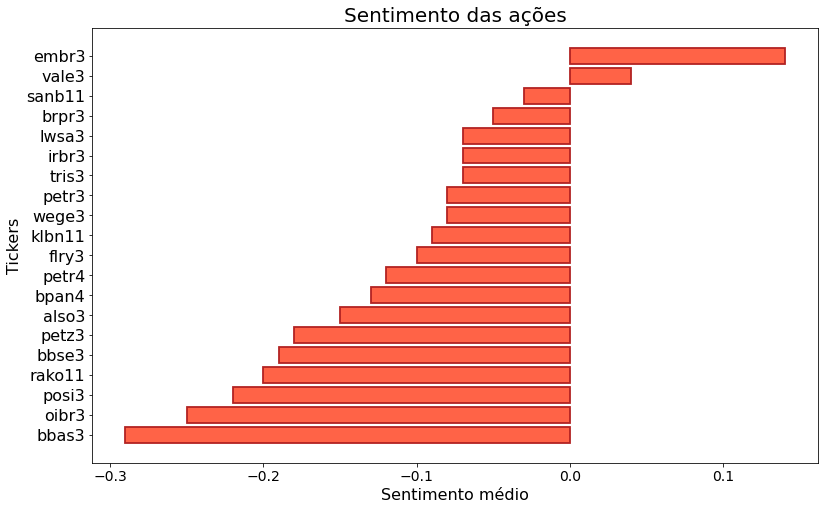

In [ ]:
plt.figure(figsize=(13,8))

MASTERCT=MASTERC.T.sort_values(by=['Intensidade_Media'])

plt.barh(MASTERCT.index, MASTERCT['Intensidade_Media'], color='tomato', edgecolor= 'firebrick', linewidth=1.8) 
plt.title('Sentimento das ações', fontsize='20')
plt.xlabel('Sentimento médio', fontsize='16')
plt.ylabel('Tickers', fontsize='16')
plt.xticks(fontsize='14')
plt.yticks(fontsize='16')

plt.show();

In [ ]:
bbb=MASTERCT.index
bbb=list(bbb)
bbb.remove('oibr3')
bbb

['bbas3',
 'posi3',
 'rako11',
 'bbse3',
 'petz3',
 'also3',
 'bpan4',
 'petr4',
 'flry3',
 'klbn11',
 'wege3',
 'petr3',
 'tris3',
 'irbr3',
 'lwsa3',
 'brpr3',
 'sanb11',
 'vale3',
 'embr3']

In [ ]:
##########################################
#
###########################################
yy = varTot.sort_values(by=['Diff'], ascending=True)#[:15]
yy = yy[varTot["Diff"]<-1][:20]
len(yy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


20

In [ ]:
qtd = 50
MASTERD = pd.DataFrame(index =['Menções',
                                'Negativo',
                                'Neutro',
                                'Positivo',
                                'Intensidade_Total',
                                'Intensidade_Media'])



for w in yy["word"]:
    j=0
    data=[]
    search_words = w + " -filter:retweets"
   
    c_tweets = tw.Cursor(api.search, #search_tweets
                  q=search_words).items(qtd)
    
    
    for tweet in c_tweets:
        j+=1
        if j==qtd: # or j==1:
            print(w,j)      
        data.append(tweet.text)
    
    freq_parcial = vectorizer.transform(data)
    taux= modelo.predict_proba(freq_parcial).round(2)
    q=0
    aux=0
    for i in taux:
      aux+=(i[2]-i[0]).round(2)
    ttl=aux
    aux=(aux/len(data)).round(2)
    xxx=modelo.predict(freq_parcial)
    try:
      negneg = np.unique(xxx, return_counts=True)[1][0]
    except IndexError:
      negneg = 0
    try:
      neuneu = np.unique(xxx, return_counts=True)[1][1]
    except IndexError:
      neuneu = 0
    try:
      pospos = np.unique(xxx, return_counts=True)[1][2]
    except IndexError:
      pospos = 0
    MEIO = [len(data), negneg, neuneu, pospos, ttl, aux]
    MASTERD[w]= MEIO

MASTERD

viia3 50
azul4 50
ciel3 50
csna3 50
goll4 50
itsa4 50
amer3 50
abev3 50
rrrp3 50


,viia3,azul4,dirr3,ciel3,mrve3,ligt3,tasa4,csna3,goll4,itsa4,cury3,amer3,cmin3,recv3,slce3,cyre3,abev3,hapv3,simh3,rrrp3
Menções,50.00,50.00,23.00,50.00,12.00,21.00,30.00,50.00,50.00,50.00,10.00,50.00,44.00,15.00,45.00,13.00,50.00,30.00,13.00,50.00
Negativo,13.00,18.00,7.00,8.00,2.00,5.00,7.00,10.00,6.00,21.00,9.00,20.00,6.00,8.00,8.00,1.00,6.00,5.00,2.00,17.00
Neutro,35.00,32.00,14.00,39.00,9.00,14.00,21.00,35.00,37.00,27.00,1.00,27.00,37.00,7.00,31.00,12.00,42.00,23.00,11.00,30.00
Positivo,2.00,0.00,2.00,3.00,1.00,2.00,2.00,5.00,7.00,2.00,0.00,3.00,1.00,0.00,6.00,0.00,2.00,2.00,0.00,3.00
Intensidade_Total,-10.17,-7.11,-5.68,-2.42,-1.82,-1.55,-1.51,-0.76,1.02,-3.42,0.42,-6.34,-2.00,-4.26,-0.54,-1.43,-2.11,-2.50,-1.19,-9.74
Intensidade_Media,-0.20,-0.14,-0.25,-0.05,-0.15,-0.07,-0.05,-0.02,0.02,-0.07,0.04,-0.13,-0.05,-0.28,-0.01,-0.11,-0.04,-0.08,-0.09,-0.19


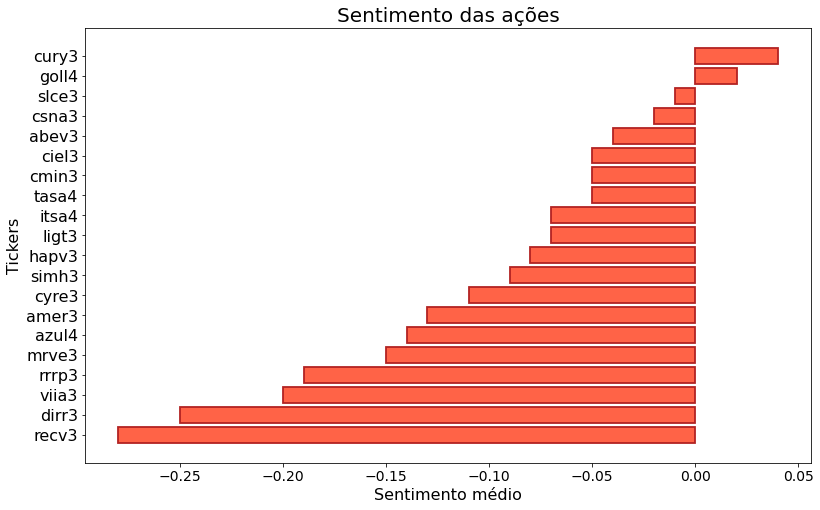

In [ ]:
plt.figure(figsize=(13,8))

MASTERDT=MASTERD.T.sort_values(by=['Intensidade_Media'])

plt.barh(MASTERDT.index, MASTERDT['Intensidade_Media'], color='tomato', edgecolor= 'firebrick', linewidth=1.8) 
plt.title('Sentimento das ações', fontsize='20')
plt.xlabel('Sentimento médio', fontsize='16')
plt.ylabel('Tickers', fontsize='16')
plt.xticks(fontsize='14')
plt.yticks(fontsize='16')

plt.show();

In [ ]:
MASTER.to_csv('feelTopStocks.csv', index = True)
!cp feelTopStocks.csv "drive/My Drive/Colab Notebooks/Dados"

MASTERC.to_csv('feelUpStocks.csv', index = True)
!cp feelUpStocks.csv "drive/My Drive/Colab Notebooks/Dados"

MASTERD.to_csv('feelDownStocks.csv', index = True)
!cp feelDownStocks.csv "drive/My Drive/Colab Notebooks/Dados"

NameError: ignored

In [ ]:
len(x)
len(topp)


30

In [ ]:
##############################################################
#
##############################################################

In [ ]:
pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.9 MB/s 
     |████████████████████████████████| 235 kB 50.7 MB/s 
     |████████████████████████████████| 6.4 MB 48.1 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=7ffb0127d72f54e7d853c35b07fa6203660474e3bb1e9719f23ac7666c376163
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy as ip
from datetime import datetime, timedelta
import plotly.graph_objs as go

In [ ]:
def format_date(dt, format='%d/%m/%Y'):
    return dt.strftime(format)

atraso = 30
dt_start = datetime.today() - timedelta(days=atraso)
dt_end = datetime.today()

intervals=['Daily','Weekly']
df= ip.get_stock_historical_data(stock='tend3',
                                 country='Brazil',
                                 from_date=format_date(dt_start),
                                 to_date=format_date(dt_end),
                                 interval='Daily')

In [ ]:
def plotCandleStick(df, acao='ticket'):
  tracel = {
      'x': df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }
  data = [tracel]
  layout = go.Layout()
  fig = go.Figure(data=data, layout=layout)
  return fig

In [ ]:
fig = plotCandleStick(df)
fig

In [ ]:
def consultar_acao(acao, dt_start):
    df= ip.get_stock_historical_data(stock=acao,
                                 country='Brazil',
                                 from_date=format_date(dt_start),
                                 to_date=format_date(dt_end),
                                 interval='Daily')
    return df
    

In [ ]:
dt_start = datetime.today() - timedelta(days=atraso)
df = consultar_acao("petr4",dt_start)
fig = plotCandleStick(df)
fig

In [ ]:
sInfo = ip.get_stock_information('bbdc4', country='Brazil')
sInfo

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
0,BBDC4,16.72,16.18-16.48,9.545000e+10,16.48,16.18-22.59,2.25,15603500.0,1.633700e+11,0.5622(3.36%),37020668.0,7.59,1.18,-25.49%,1.065849e+10,04/08/2022


In [ ]:
techInfo = ip.technical_indicators('bbdc4', country='Brazil',product_type='stock')
techInfo

,technical_indicator,value,signal
0,RSI(14),25.5660,sell
1,"STOCH(9,6)",44.2090,sell
2,STOCHRSI(14),0.0000,oversold
3,"MACD(12,26)",-0.5900,sell
4,ADX(14),65.1050,sell
5,Williams %R,-96.2960,oversold
6,CCI(14),-201.0451,oversold
7,ATR(14),0.4336,less_volatility
8,Highs/Lows(14),-0.8243,sell
9,Ultimate Oscillator,35.2670,sell


In [ ]:
print(techInfo.iloc[0][1])
print(techInfo.iloc[1][1])
print(techInfo.iloc[3][1])
print(techInfo.iloc[4][1])


25.566
44.209
-0.59
65.105


In [ ]:
mmInfo = ip.moving_averages('tasa4', country='Brazil',product_type='stock')
mmInfo

,period,sma_value,sma_signal,ema_value,ema_signal
0,5,16.92,sell,16.89,sell
1,10,16.85,sell,16.87,sell
2,20,16.81,sell,17.22,sell
3,50,18.88,sell,18.72,sell
4,100,21.34,sell,20.20,sell
5,200,21.85,sell,21.21,sell


In [ ]:
print("Indicadores")
print("Fechamento:           ", sInfo.iloc[0]["Prev. Close"])
print("Preço/Lucro:          ", sInfo.iloc[0]["P/E Ratio"])
print("Variação em 12 meses: ", sInfo.iloc[0]["1-Year Change"])
print("Dividendo (yield):     R$", sInfo.iloc[0]["Dividend (Yield)"])
print("Volume médio (3m):    ", sInfo.iloc[0]["Average Vol. (3m)"])
print("Receita (milhões R$)  ", sInfo.iloc[0]["Revenue"]/1000000)



Indicadores
Fechamento:            16.72
Preço/Lucro:           7.59
Variação em 12 meses:  -25.49%
Dividendo (yield):     R$ 0.5622(3.36%)
Volume médio (3m):     37020668.0
Receita (milhões R$)   95450.0


In [ ]:
rev=sInfo.iloc[0]["Revenue"]/1000000
rev=int(rev)
rev=str(rev)
rev=rev[:-3]+"."+rev[-3:]
rev

'95.450'

In [ ]:
"{:,}".format(int(26387442.0)).replace(',','.')

'26.387.442'

In [ ]:
rev[-3:]

'450'